# Task 3 - Exploratory Data Analysis - Retail

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv(r"C:\Users\mohdf\AppData\Local\Programs\Python\Python37\tsec_ML\grip data\SampleSuperstore.csv") 
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 13)

In [4]:
df.isnull()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df = df.drop('Country',axis=1)
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
df['Cost']=df['Sales']-df['Profit']
df['Cost']

0        220.0464
1        512.3580
2          7.7486
3       1340.6085
4         19.8516
          ...    
9989      21.1452
9990      76.3268
9991     239.1828
9992      16.2800
9993     170.2120
Name: Cost, Length: 9994, dtype: float64

In [15]:
df['Sub-Category'].nunique()

17

In [8]:
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.7486
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,19.8516


In [9]:
df['Profit percent']=(df['Profit']/df['Cost'])*100

In [10]:
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit percent
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464,19.047619
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580,42.857143
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.7486,88.679245
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085,-28.571429
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,19.8516,12.676056


In [11]:
df.sort_values(['Profit percent','Sub-Category'],ascending=False).groupby('Profit percent').head(5)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit percent
1696,Second Class,Home Office,Bayonne,New Jersey,7002,East,Technology,Phones,104.980,2,0.0,52.4900,52.4900,100.000000
2592,Second Class,Corporate,Summerville,South Carolina,29483,South,Technology,Phones,79.100,2,0.0,39.5500,39.5500,100.000000
6338,Standard Class,Corporate,New York City,New York,10035,East,Technology,Phones,87.800,4,0.0,43.9000,43.9000,100.000000
246,Second Class,Home Office,Lakeville,Minnesota,55044,Central,Office Supplies,Paper,47.880,6,0.0,23.9400,23.9400,100.000000
381,First Class,Corporate,San Francisco,California,94109,West,Office Supplies,Paper,50.960,7,0.0,25.4800,25.4800,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,Standard Class,Corporate,Austin,Texas,78745,Central,Office Supplies,Appliances,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,Standard Class,Corporate,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,92.2050,-73.333333
9164,Standard Class,Consumer,Chicago,Illinois,60610,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,536.7300,-73.333333
261,Standard Class,Corporate,Pasadena,Texas,77506,Central,Office Supplies,Appliances,1.624,2,0.8,-4.4660,6.0900,-73.333333


Text(0, 0.5, 'Sales')

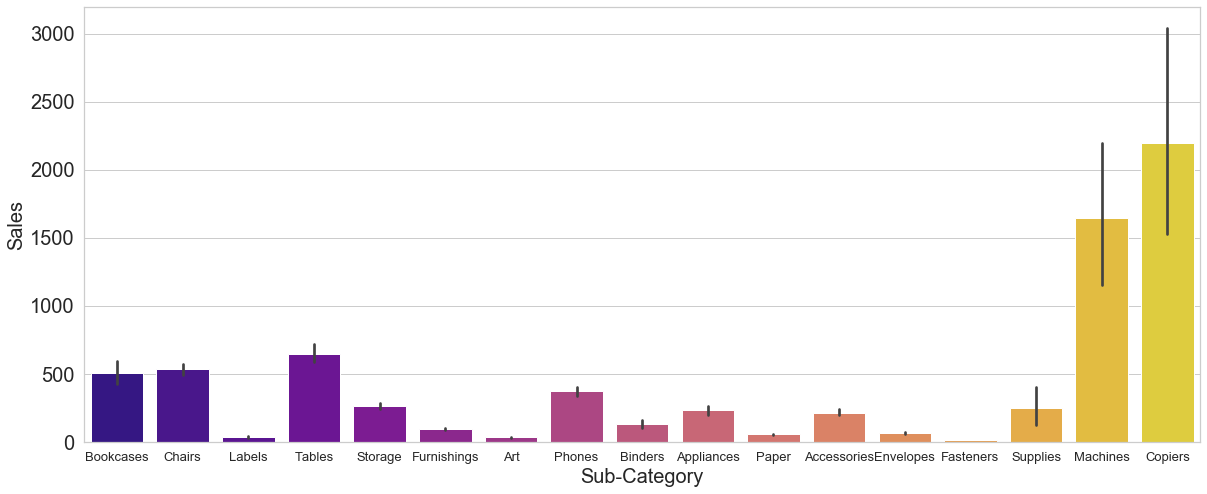

In [49]:
 # change the estimator from mean to
# standard devaition 
plt.figure(figsize=[20,8])
sns.barplot(x ='Sub-Category', y ='Sales', data = df,  
            palette ='plasma')
plt.xticks(fontsize='13')
plt.yticks(fontsize='20')
plt.xlabel("Sub-Category",fontsize=20)
plt.ylabel("Sales",fontsize=20)

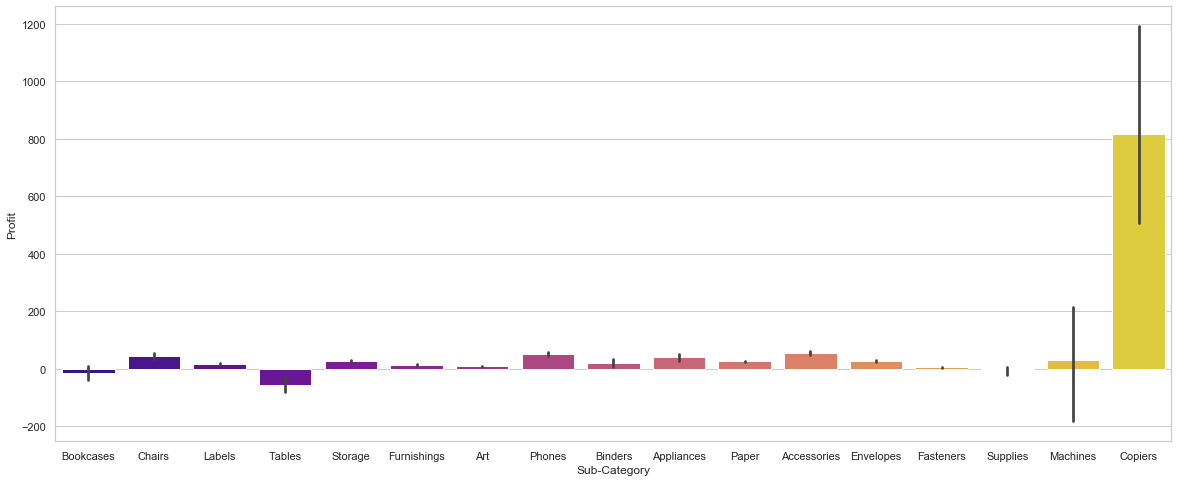

In [35]:
plt.figure(figsize=[20,8])
sns.barplot(x ='Sub-Category', y ='Profit', data = df,  
            palette ='plasma')

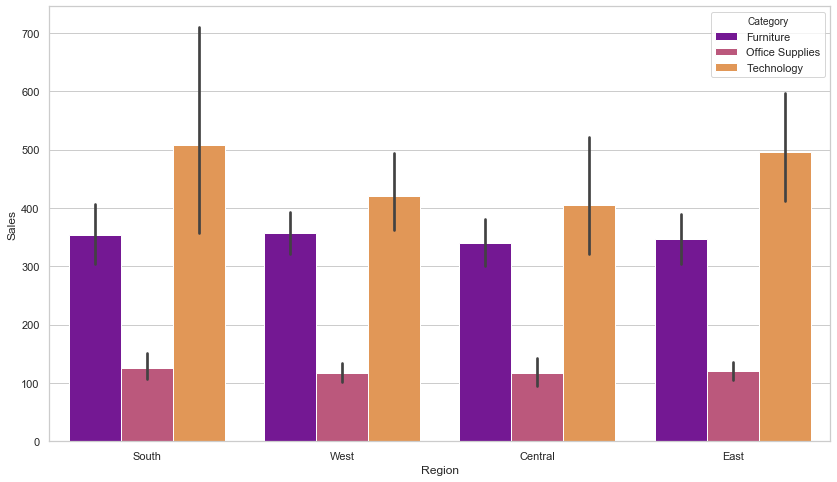

In [25]:
plt.figure(figsize=[14,8])
sns.barplot(x ='Region', y ='Sales',hue = 'Category', data = df,  
            palette ='plasma')

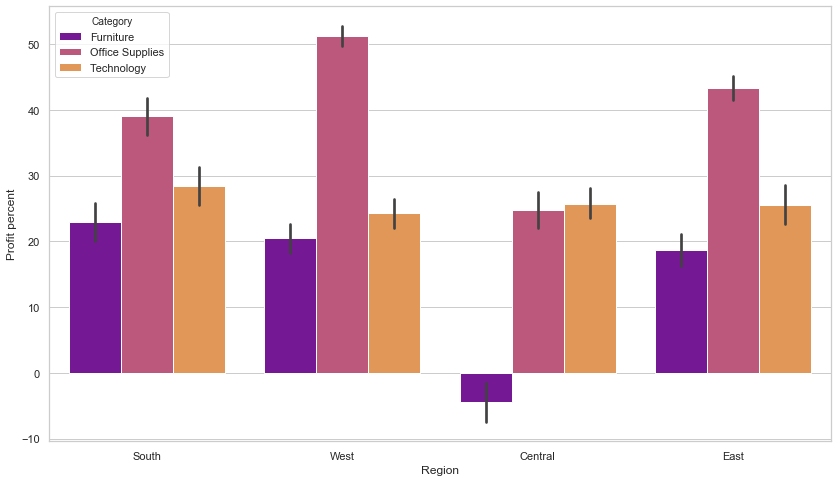

In [28]:
plt.figure(figsize=[14,8])
sns.barplot(x ='Region', y ='Profit percent',hue = 'Category', data = df,  
            palette ='plasma')

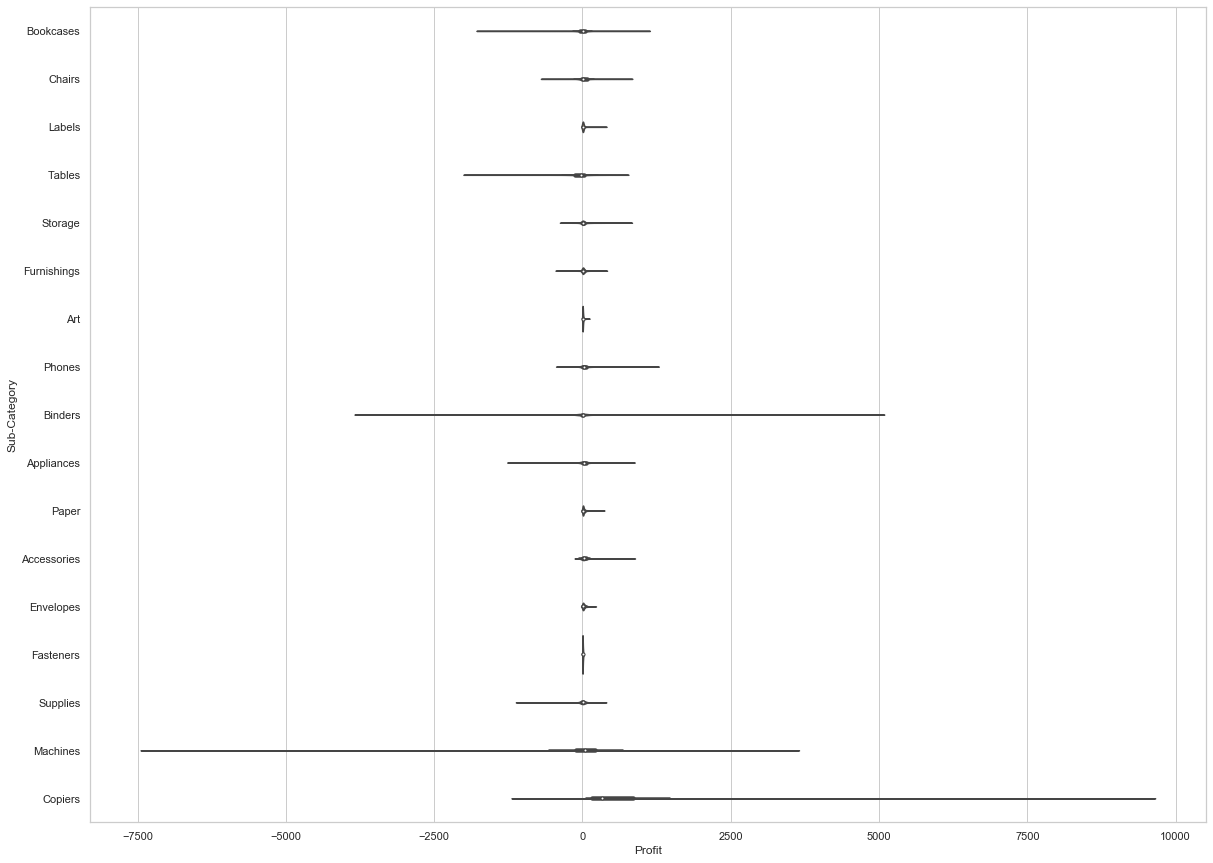

In [51]:
plt.figure(figsize=[20,15])
sns.violinplot(x='Profit', y='Sub-Category', data=df,
                split=True)

(array([-200., -100.,    0.,  100.,  200.,  300.,  400.]),
 <a list of 7 Text yticklabel objects>)

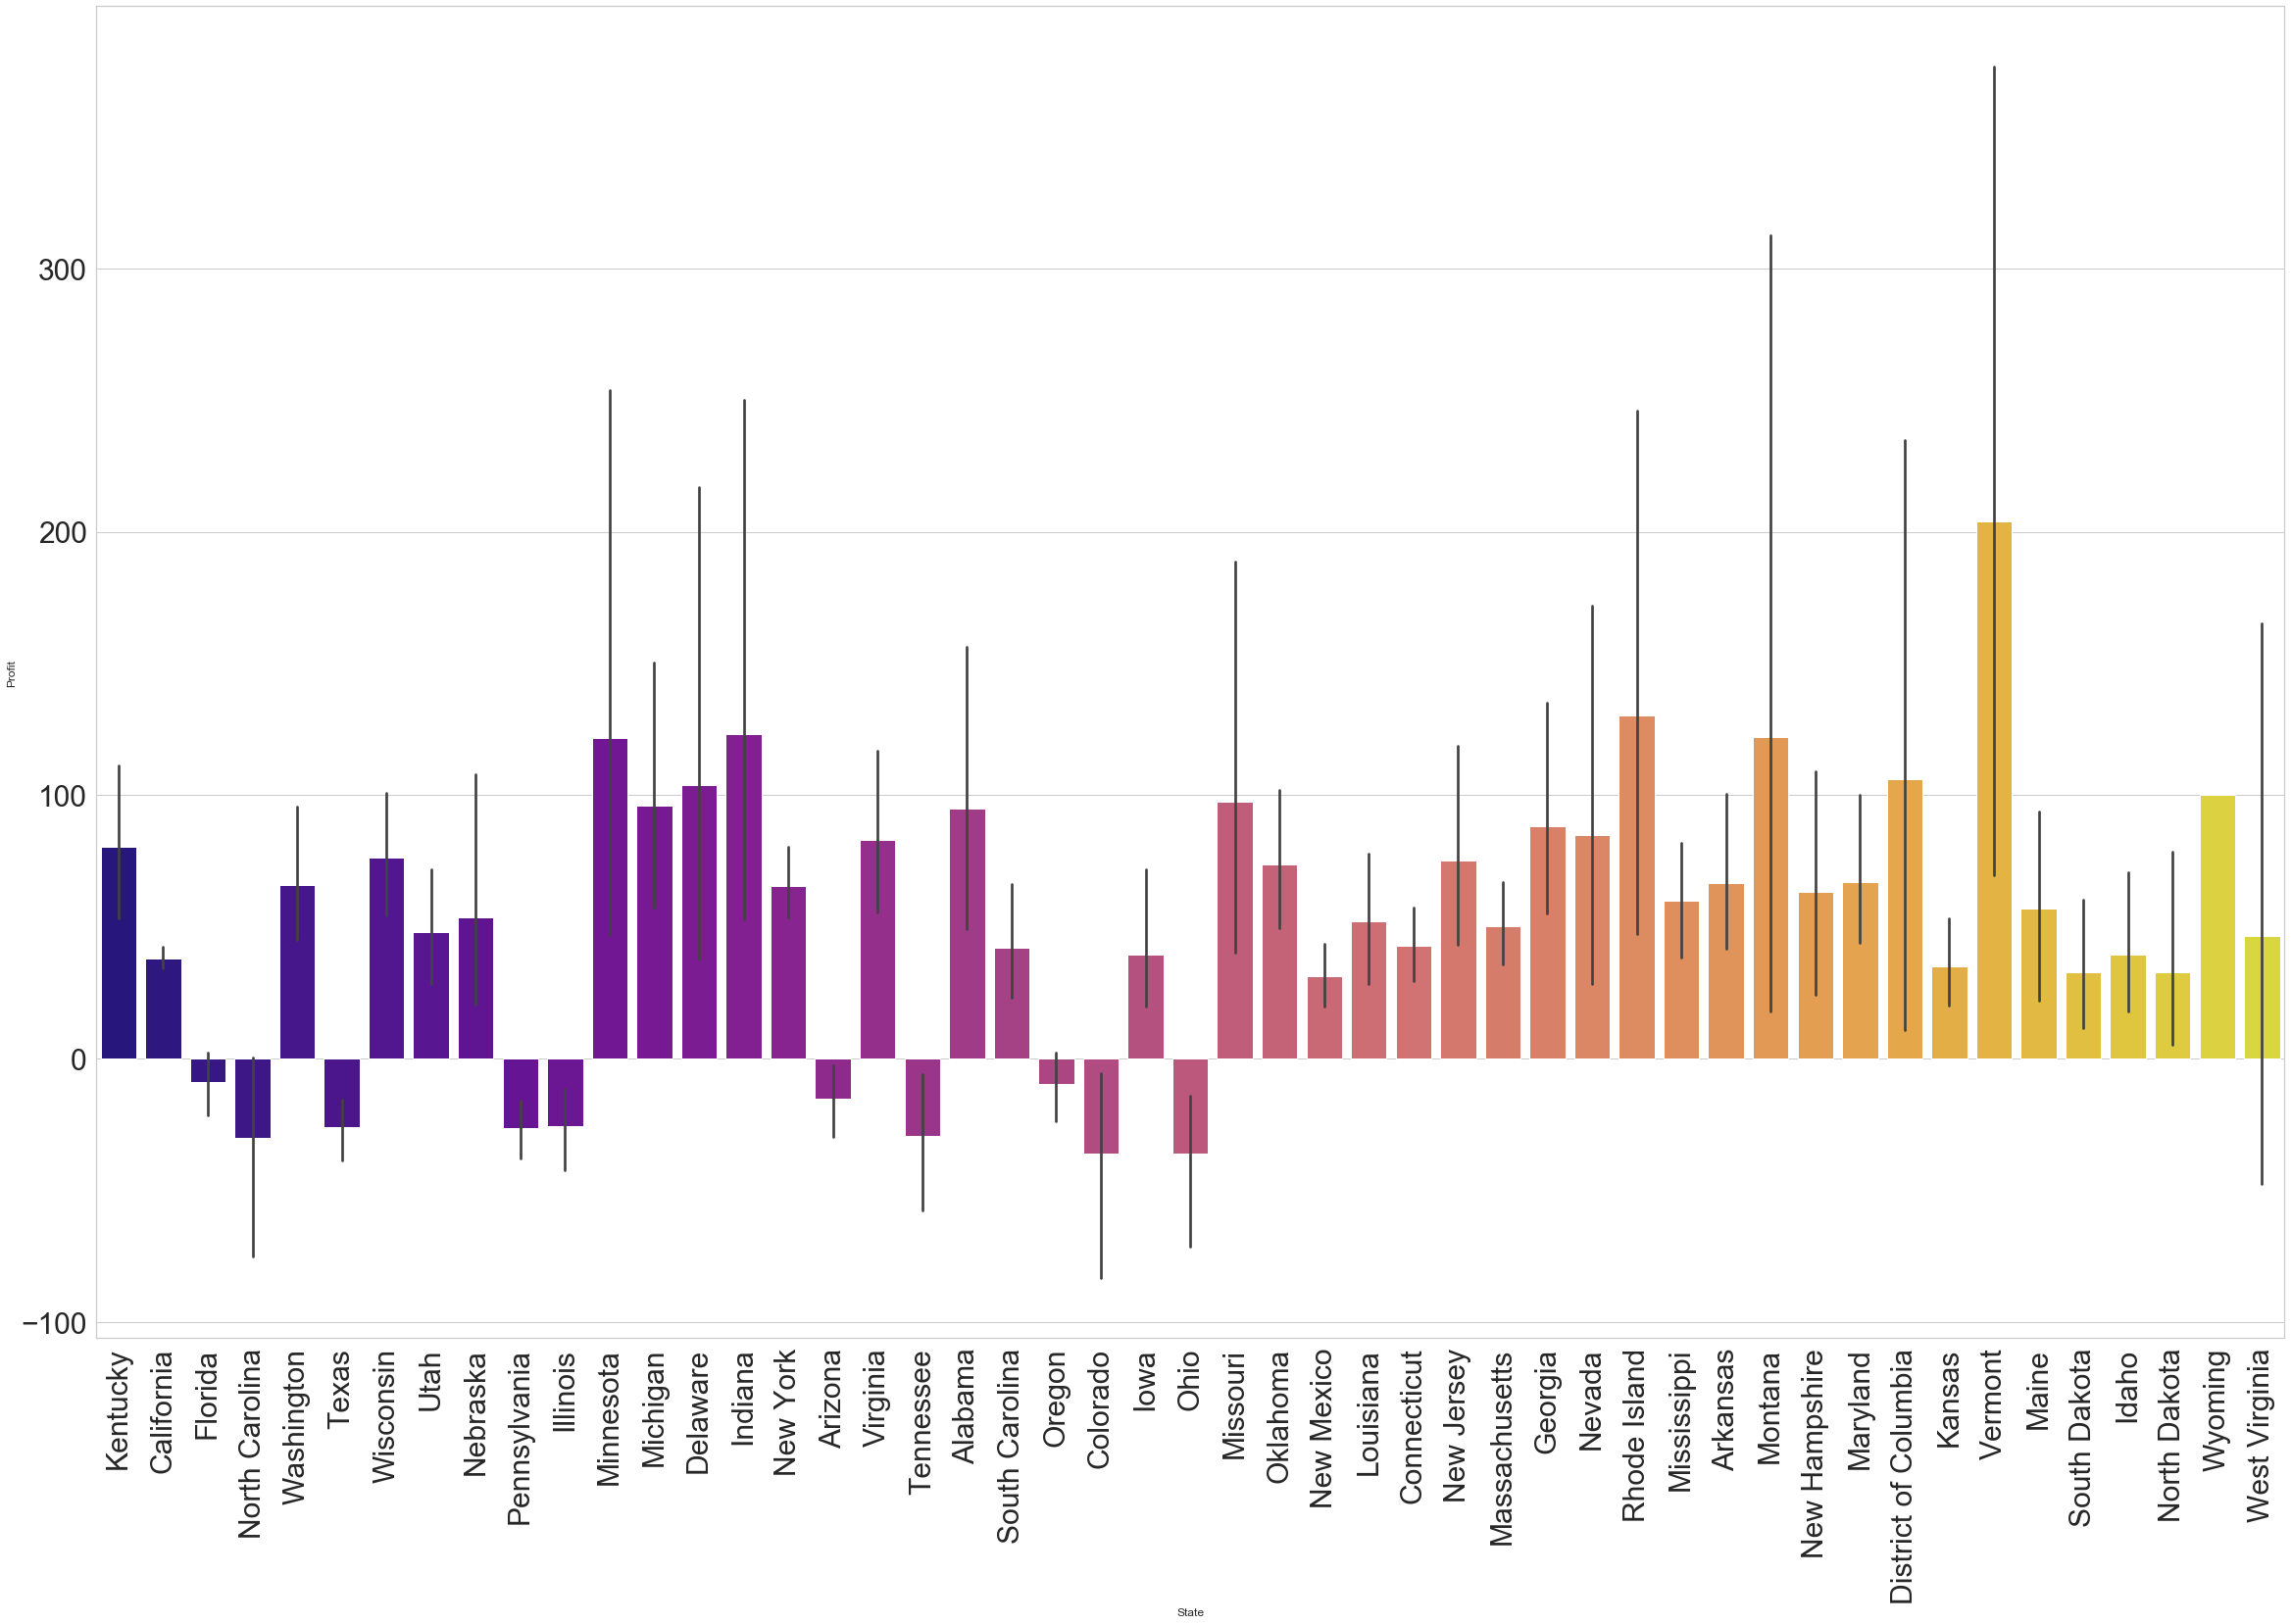

In [45]:
plt.figure(figsize=[40,25])
sns.barplot(x ='State', y ='Profit', data = df,  
            palette ='plasma')
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800.]), <a list of 10 Text yticklabel objects>)

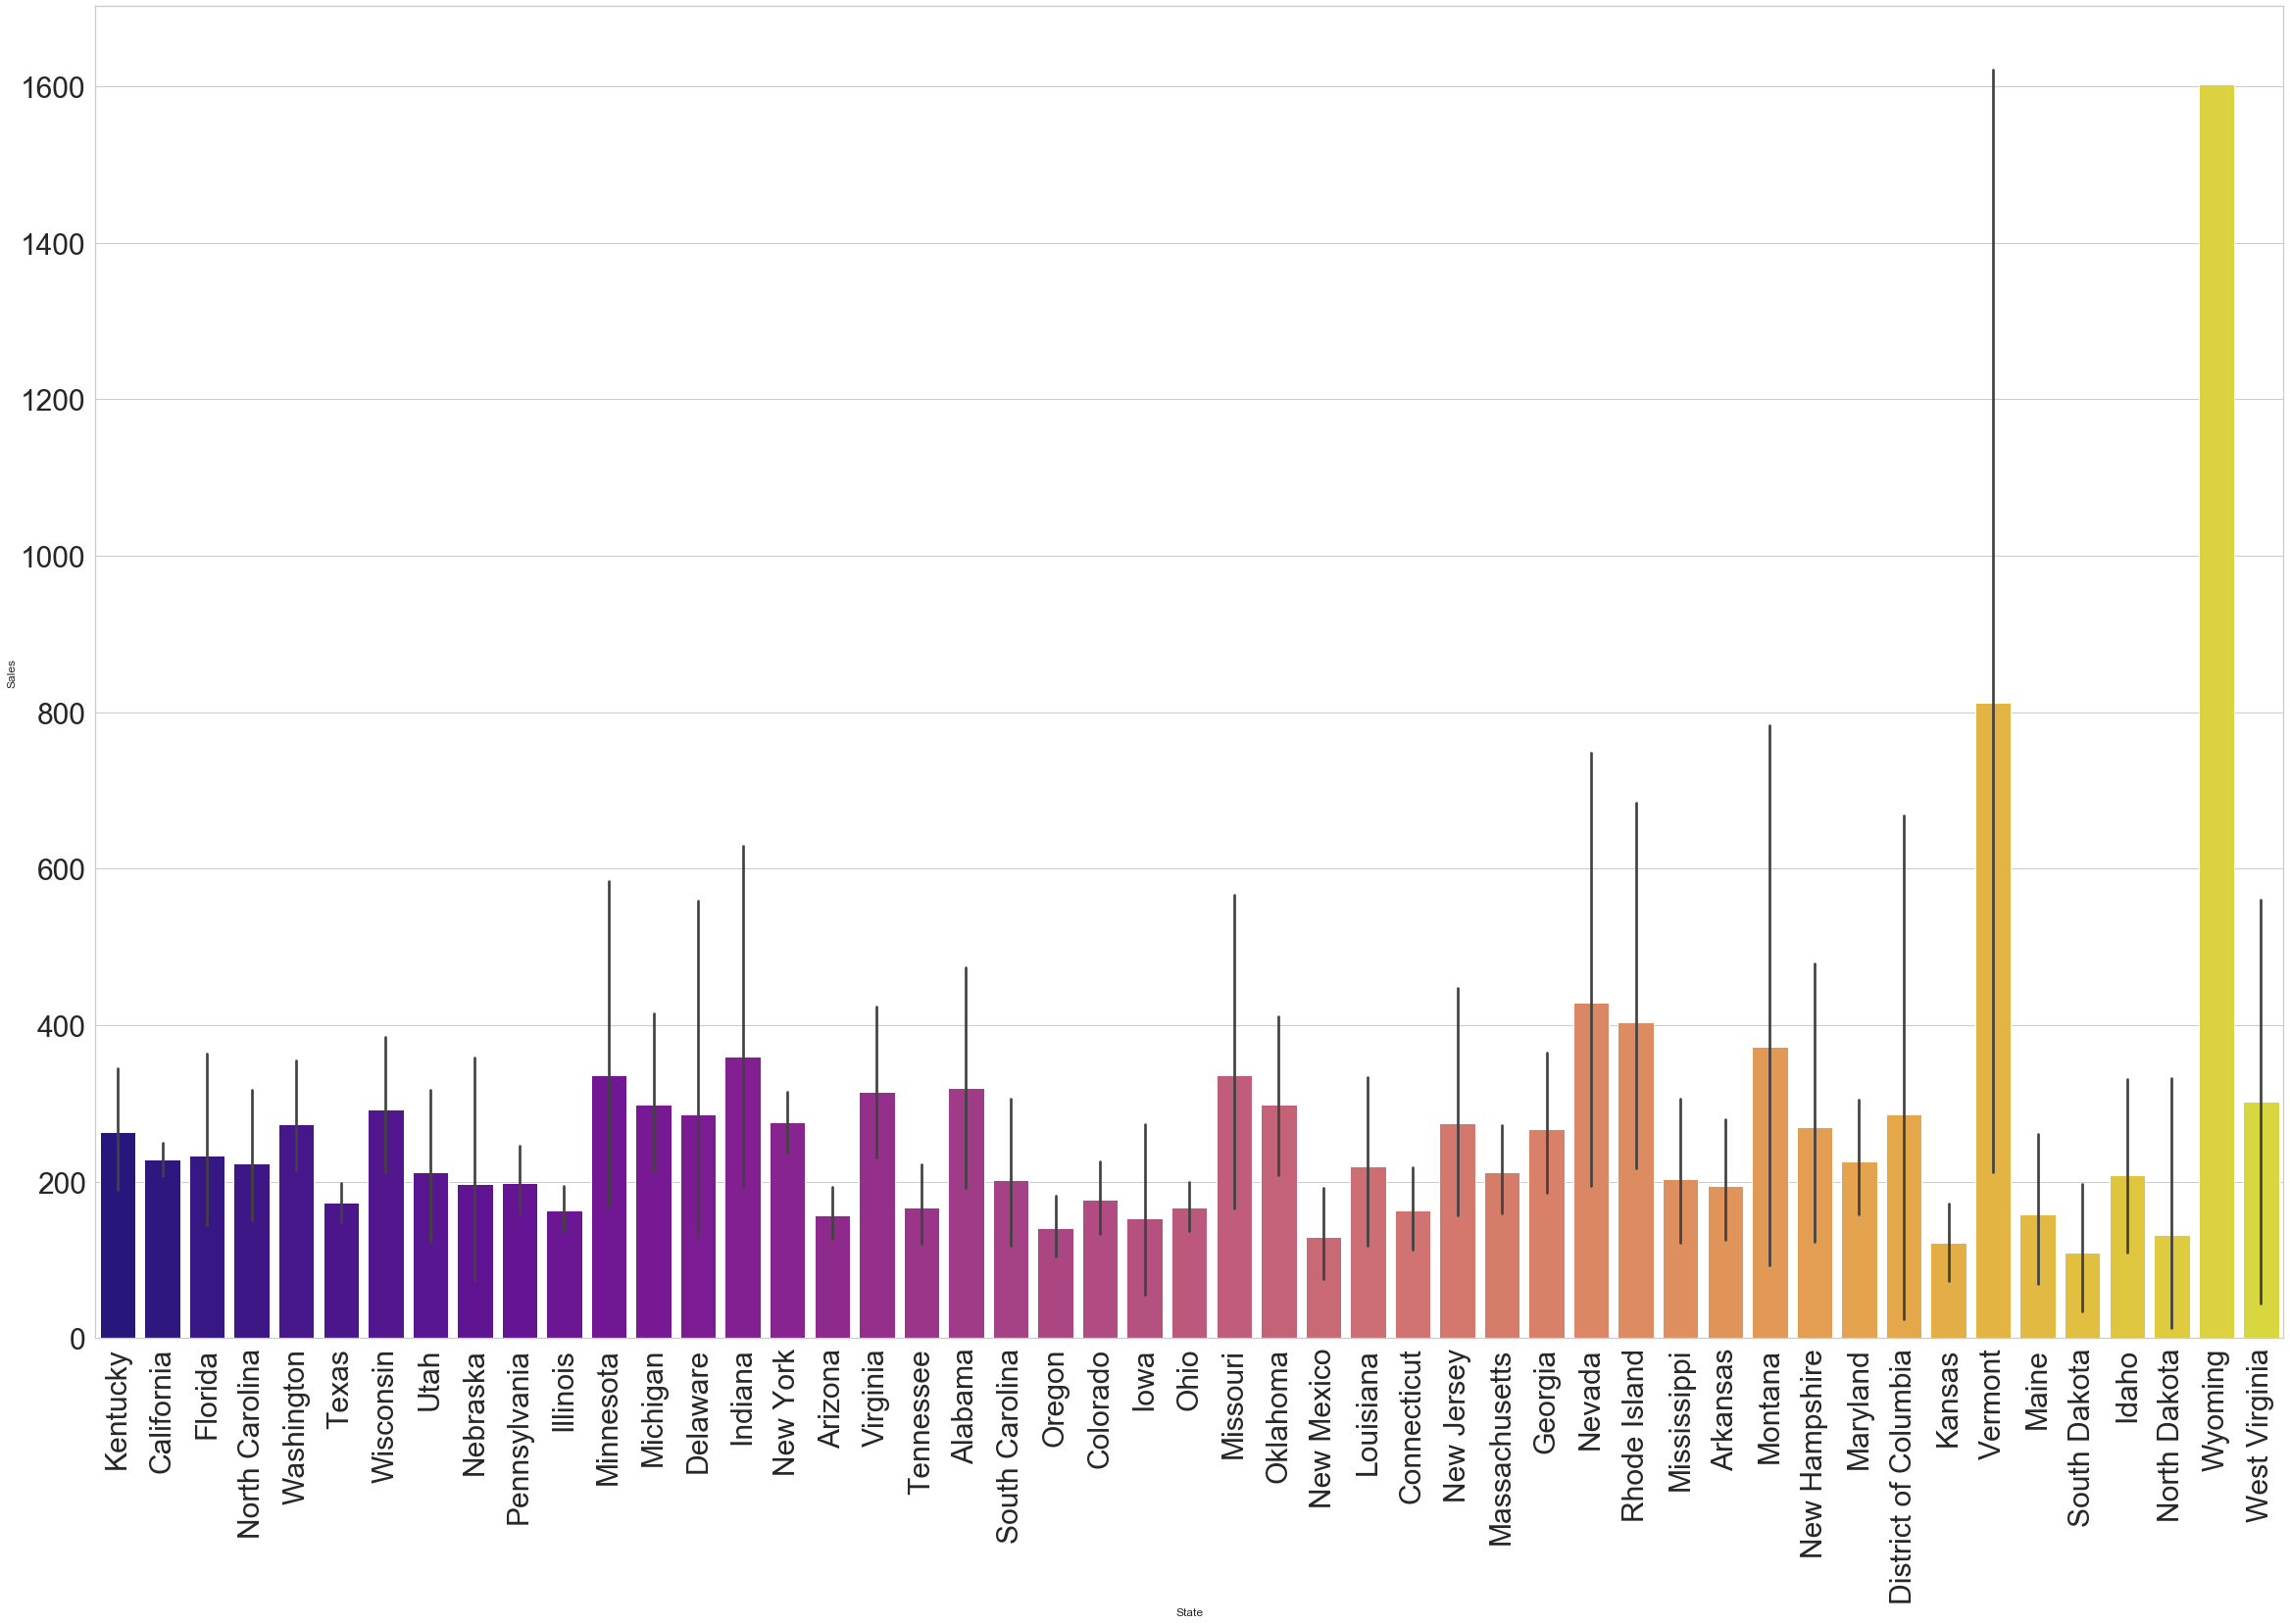

In [52]:
plt.figure(figsize=[40,25])
sns.barplot(x ='State', y ='Sales', data = df,  
            palette ='plasma')
plt.xticks(rotation=90, fontsize=30)
plt.yticks(fontsize=30)

# CONLUSION:ACCORDING TO THE ANALYSIS
1. COPIERS IN THE SUB-CATEGORY HAS THE HIGHEST SALES.
2. COPIERS HAS THE HIGHEST PROFIT IN THE SUB-CATEGORY.
3. SOUTH REGION HAS THE HIGHEST SALES PATICULARLY IN THE TECHNOLOGY CATEGORY.
4. VERMONT,RHODE ISLAND AND INDIANA HAS THE HIGHEST PROFIT.
5. WYOMING AND VERMONT.
